In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [14]:
## step 1 : generate synthetic data
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
y = y.reshape(-1,1)


In [15]:
# standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
## sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# loss function
def compute_loss(y, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# logistic regression
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.losses = []

        for i in range(self.epochs):
            Z = np.dot(X, self.W) + self.b
            y_pred = sigmoid(Z)
            
            loss = compute_loss(y, y_pred)
            self.losses.append(loss)

            dW = np.dot(X.T, (y_pred - y)) / self.m
            db = np.sum(y_pred - y) / self.m

            self.W -= self.lr * dW
            self.b -= self.lr * db

            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
    
    def predict(self, X):
        Z = np.dot(X, self.W) + self.b
        return sigmoid(Z) >= 0.5

In [18]:
## Training the model
model = LogisticRegressionScratch(lr=0.1, epochs= 1000)
model.fit(X_train, y_train)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.3829
Epoch 200, Loss: 0.3471
Epoch 300, Loss: 0.3351
Epoch 400, Loss: 0.3298
Epoch 500, Loss: 0.3271
Epoch 600, Loss: 0.3256
Epoch 700, Loss: 0.3247
Epoch 800, Loss: 0.3242
Epoch 900, Loss: 0.3239


In [19]:
# Evaluation
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 88.00%


In [20]:
## plotting the decision boundaries 
def plot_decision_boundary(X,y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, model.W) + model.b).reshape(xx.shape)


    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="RdBu", edgecolors='k')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    plot_decision_boundary(X, y, model)
    

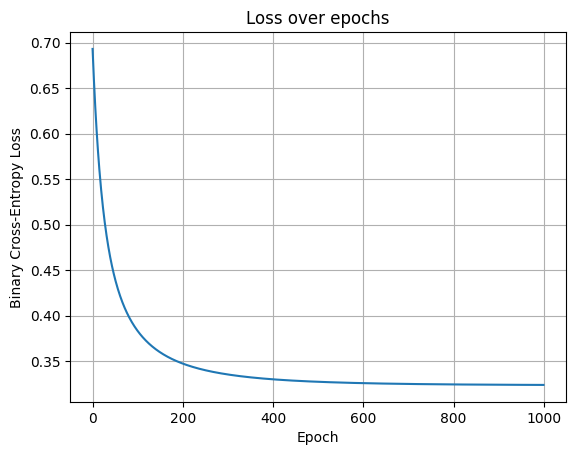

In [21]:
### Plotting the loss curve
plt.plot(model.losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()
